# Creating a classification model to predict the sentiment either (1 or 0) based
on Amazon Alexa reviews

In [1]:
#IMPORTING REQUIRED MODULES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#READ DATA
data=pd.read_csv('amazon_alexa.csv')
df=pd.DataFrame(data)

In [3]:
df.head()

,Unnamed: 0,rating,date,variation,verified_reviews,feedback
0,0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,4,5,31-Jul-18,Charcoal Fabric,Music,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        3150 non-null   int64 
 1   rating            3150 non-null   int64 
 2   date              3150 non-null   object
 3   variation         3150 non-null   object
 4   verified_reviews  3150 non-null   object
 5   feedback          3150 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 147.8+ KB


In [5]:
df.isnull().sum()

Unnamed: 0          0
rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [6]:
df.drop(df.filter(regex="Unname"),axis=1, inplace=True)
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [7]:
df.drop(df.filter(regex="date"),axis=1,inplace=True)
df.drop(df.filter(regex="variation"),axis=1,inplace=True)
df.head()

,rating,verified_reviews,feedback
0,5,Love my Echo!,1
1,5,Loved it!,1
2,4,"Sometimes while playing a game, you can answer...",1
3,5,I have had a lot of fun with this thing. My 4 ...,1
4,5,Music,1


C:\Users\Sowmya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rating', ylabel='count'>

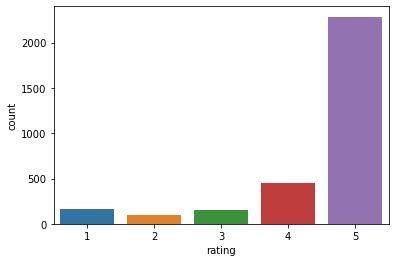

In [8]:
sns.countplot(df['rating'],label='count')

C:\Users\Sowmya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='feedback', ylabel='count'>

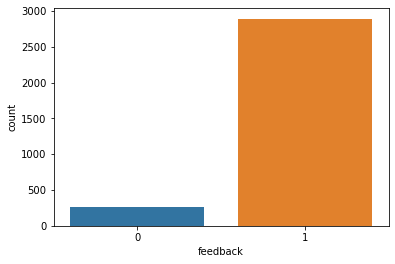

In [9]:
sns.countplot(df['feedback'],label='count')

CREATE A COLUMN FOR LENGTH OF THE REVIEWS

In [10]:
df['length_of_reviews']=df['verified_reviews'].apply(len)
df.head()

,rating,verified_reviews,feedback,length_of_reviews
0,5,Love my Echo!,1,13
1,5,Loved it!,1,9
2,4,"Sometimes while playing a game, you can answer...",1,195
3,5,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,Music,1,5


WE CAN OBSERVE THAT MANY OF THE REVIEWS ARE SHORT IN LENGTH

<AxesSubplot:>

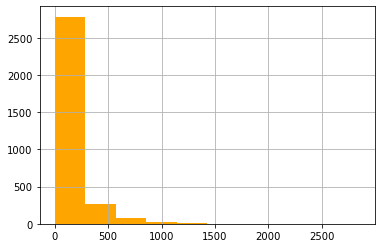

In [11]:
df['length_of_reviews'].hist(bins=10,color='orange')

In [12]:
#Statistical summary
df.describe()

,rating,feedback,length_of_reviews
count,3150.000000,3150.000000,3150.000000
mean,4.463175,0.918413,132.049524
std,1.068506,0.273778,182.099952
min,1.000000,0.000000,1.000000
25%,4.000000,1.000000,30.000000
50%,5.000000,1.000000,74.000000
75%,5.000000,1.000000,165.000000
max,5.000000,1.000000,2851.000000


Shortest review length is only length 1 and max length review is 2851

In [13]:
#Shortest Review
df[df['length_of_reviews'] == 1]['verified_reviews'].iloc[0]

'😍'

In [14]:
#Average length review
df[df['length_of_reviews'] == 134]['verified_reviews'].iloc[0]

"I love Alexa! It's great helping me, making my appointments, playing the songs I like! What else can you do? Looking forward for more."

In [15]:
#Longest review
df[df['length_of_reviews'] == 2851]['verified_reviews'].iloc[0]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

In [16]:
review_list=df['verified_reviews'].tolist()
len(review_list)

3150

In [17]:
reviews_string=" ".join(review_list)
reviews_string

'Love my Echo! Loved it! Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. Music I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do. Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet. I think this is the 5th one I\'ve purchased. I\'m working on 

CONVERTING THE WORDS TO LOWERCASE AND REMOVING THE PUNCTUATIONS AND STOPWORDS

In [18]:
#Importing required modules
import re
import string

In [19]:
reviews_string=reviews_string.lower()
reviews_string=reviews_string.translate(str.maketrans('','',string.punctuation))
reviews_string

'love my echo loved it sometimes while playing a game you can answer a question correctly but alexa says you got it wrong and answers the same as you  i like being able to turn lights on and off while away from home i have had a lot of fun with this thing my 4 yr old learns about dinosaurs i control the lights and play games like categories has nice sound when playing music as well music i received the echo as a gift i needed another bluetooth or something to play music easily accessible and found this smart speaker can’t wait to see what else it can do without having a cellphone i cannot use many of her features i have an ipad but do not see that of any use  it is a great alarm  if u r almost deaf you can hear her alarm in the bedroom from out in the living room so that is reason enough to keep herit is fun to ask random questions to hear her response  she does not seem to be very smartbon politics yet i think this is the 5th one ive purchased im working on getting one in every room o

In [20]:
import nltk
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [21]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [22]:
def message_cleaning(message):
    punctuation_removed = [char for char in message if char not in string.punctuation]
    punctuation_removed_join = ''.join(punctuation_removed)
    punctuation_removed_join_clean = [word for word in punctuation_removed_join.split() if word.lower() not in stopwords.words('english')]
    return punctuation_removed_join_clean

In [23]:
df_clean = df['verified_reviews'].apply(message_cleaning)
df_clean

0                                            [Love, Echo]
1                                                 [Loved]
2       [Sometimes, playing, game, answer, question, c...
3       [lot, fun, thing, 4, yr, old, learns, dinosaur...
4                                                 [Music]
                              ...                        
3145                    [Perfect, kids, adults, everyone]
3146    [Listening, music, searching, locations, check...
3147    [love, things, running, entire, home, TV, ligh...
3148    [complaint, sound, quality, isnt, great, mostl...
3149                                               [Good]
Name: verified_reviews, Length: 3150, dtype: object

In [33]:
string = reviews_string
# Converting String into tokens
list2 = nltk.word_tokenize(string)
print(list2)
lemmatized_string = ' '.join([wnl.lemmatize(words) for words in list2])
print(lemmatized_string)  

['love', 'my', 'echo', 'loved', 'it', 'sometimes', 'while', 'playing', 'a', 'game', 'you', 'can', 'answer', 'a', 'question', 'correctly', 'but', 'alexa', 'says', 'you', 'got', 'it', 'wrong', 'and', 'answers', 'the', 'same', 'as', 'you', 'i', 'like', 'being', 'able', 'to', 'turn', 'lights', 'on', 'and', 'off', 'while', 'away', 'from', 'home', 'i', 'have', 'had', 'a', 'lot', 'of', 'fun', 'with', 'this', 'thing', 'my', '4', 'yr', 'old', 'learns', 'about', 'dinosaurs', 'i', 'control', 'the', 'lights', 'and', 'play', 'games', 'like', 'categories', 'has', 'nice', 'sound', 'when', 'playing', 'music', 'as', 'well', 'music', 'i', 'received', 'the', 'echo', 'as', 'a', 'gift', 'i', 'needed', 'another', 'bluetooth', 'or', 'something', 'to', 'play', 'music', 'easily', 'accessible', 'and', 'found', 'this', 'smart', 'speaker', 'can', '’', 't', 'wait', 'to', 'see', 'what', 'else', 'it', 'can', 'do', 'without', 'having', 'a', 'cellphone', 'i', 'can', 'not', 'use', 'many', 'of', 'her', 'features', 'i', 

NameError: name 'wnl' is not defined

In [24]:
!pip install wordcloud

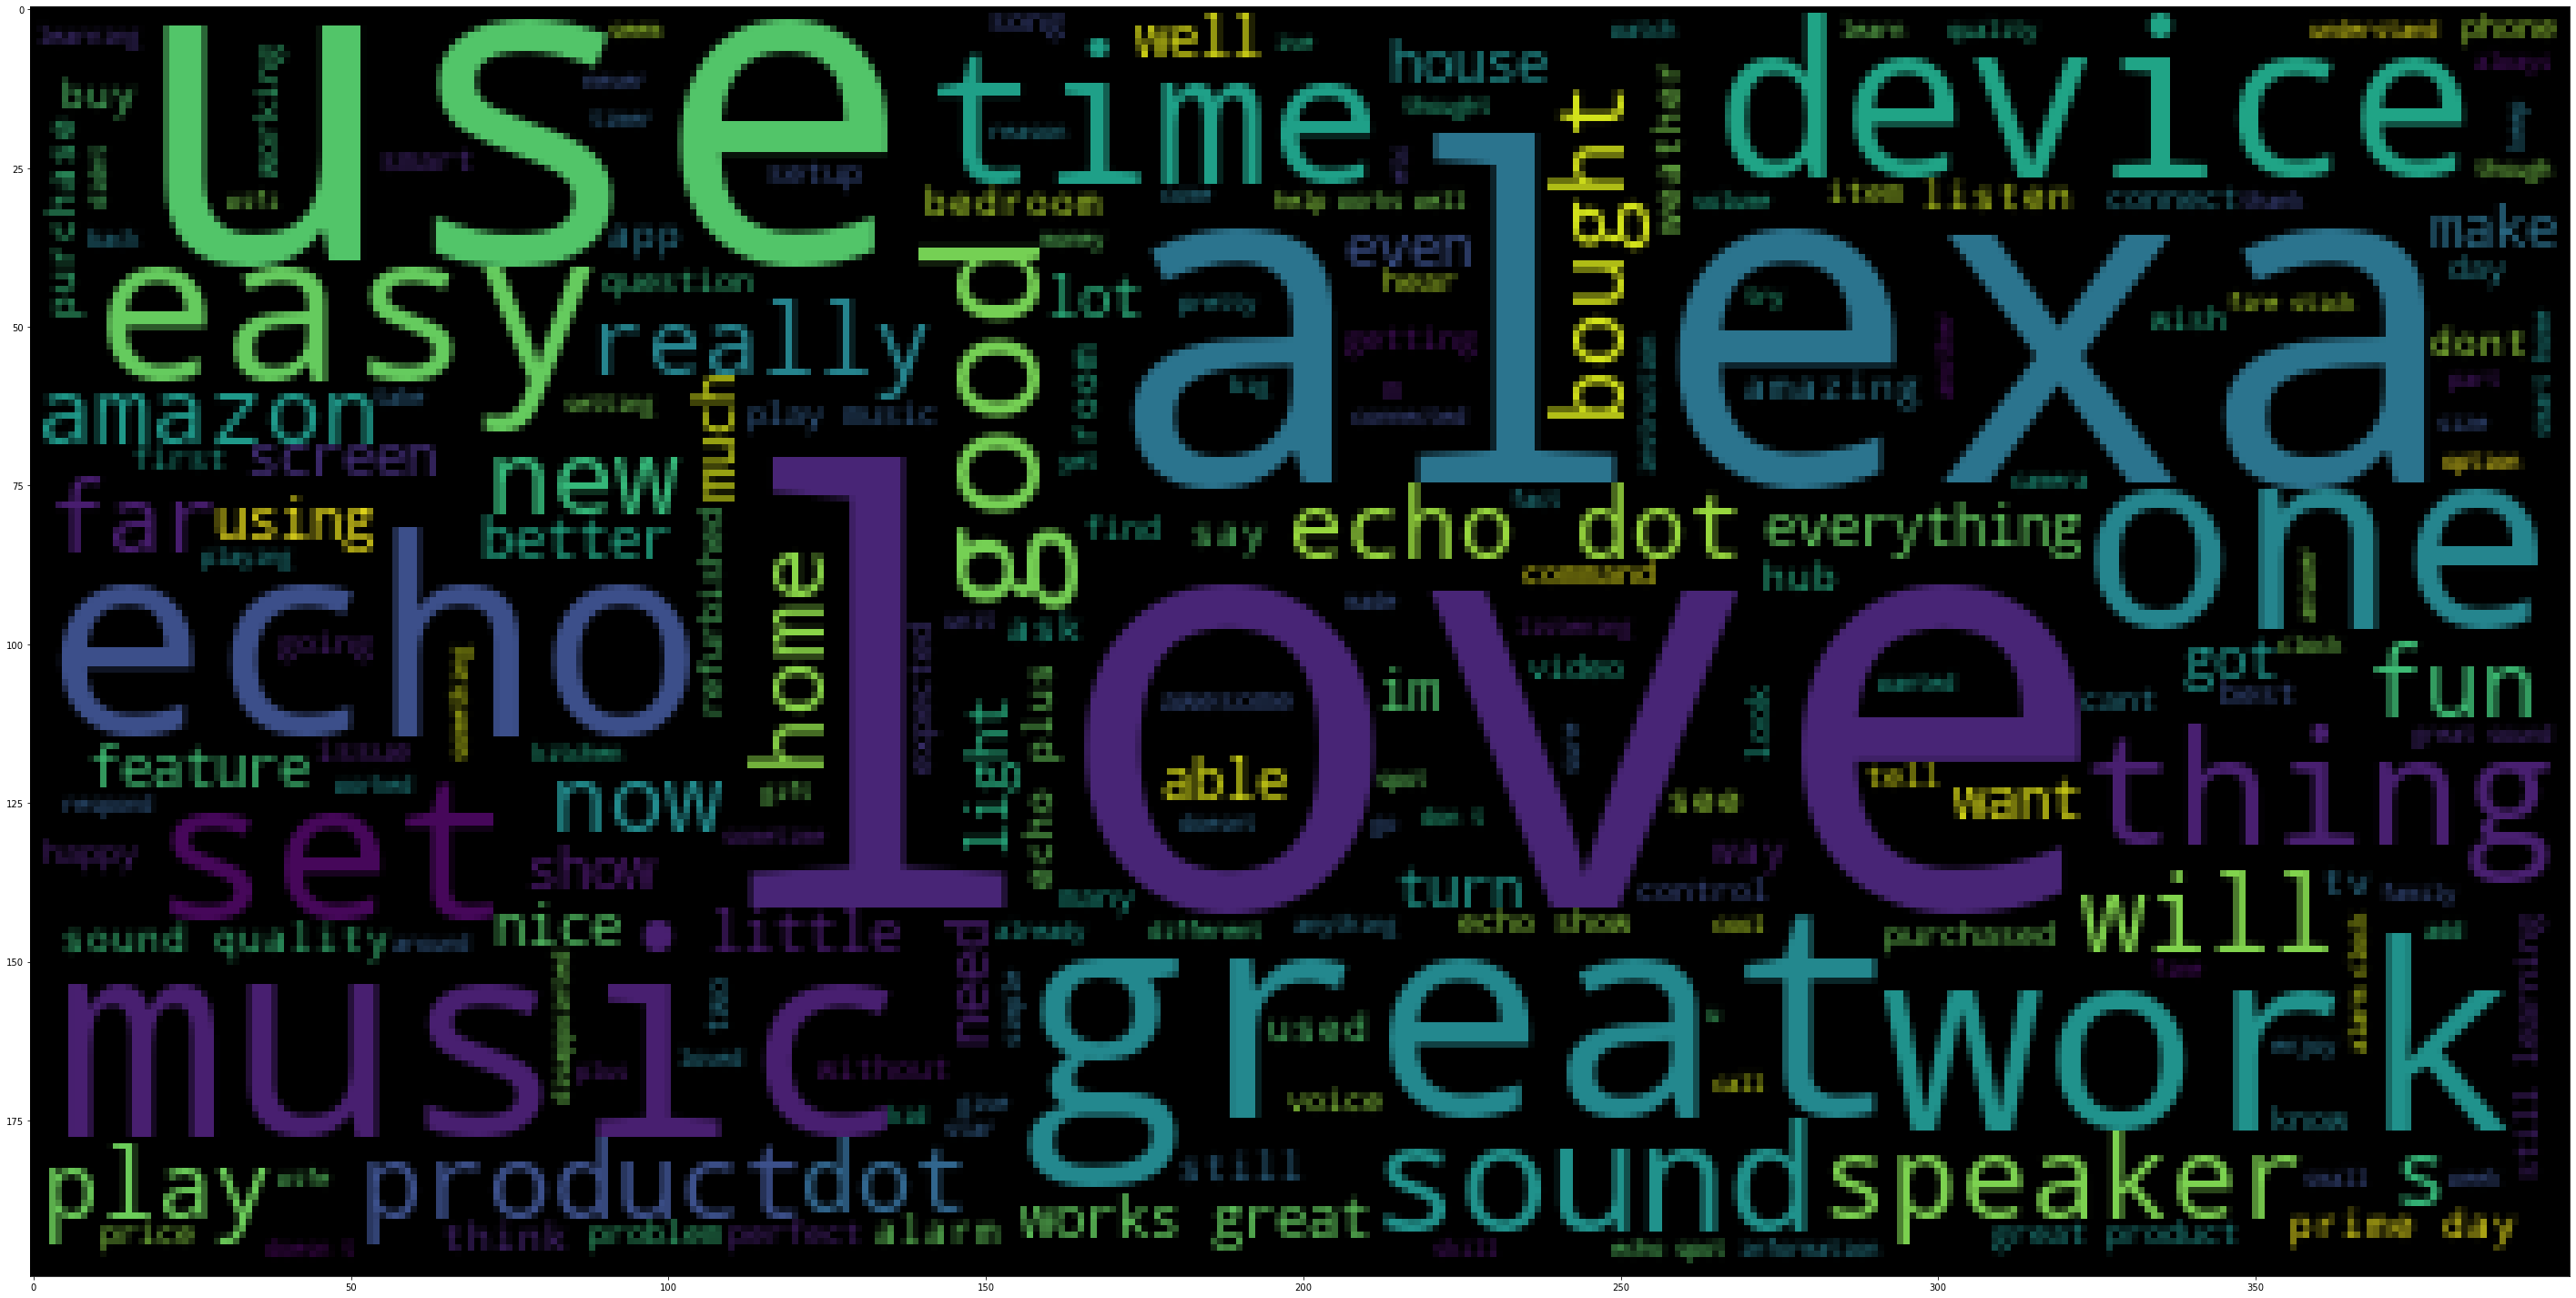

In [34]:
from wordcloud import WordCloud

plt.figure(figsize=(50,50))
plt.imshow(WordCloud().generate(string))

# COUNT VECTORISATION

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
 
document = review_list
 
# Create a Vectorizer Object
vectorizer = CountVectorizer()
 
vectorizer.fit(document)
 
# Printing the identified Unique words along with their indices
print("Vocabulary: ", vectorizer.vocabulary_)
 
# Encode the Document
vector = vectorizer.transform(document)
 
# Summarizing the Encoded Texts
print("Encoded Document is:")
print(vector.toarray())

Vocabulary:  {'love': 2150, 'my': 2320, 'echo': 1160, 'loved': 2151, 'it': 1933, 'sometimes': 3289, 'while': 3945, 'playing': 2640, 'game': 1504, 'you': 4028, 'can': 588, 'answer': 256, 'question': 2794, 'correctly': 853, 'but': 559, 'alexa': 196, 'says': 3059, 'got': 1567, 'wrong': 4008, 'and': 250, 'answers': 259, 'the': 3578, 'same': 3044, 'as': 314, 'like': 2076, 'being': 435, 'able': 79, 'to': 3646, 'turn': 3721, 'lights': 2075, 'on': 2445, 'off': 2429, 'away': 367, 'from': 1476, 'home': 1722, 'have': 1652, 'had': 1616, 'lot': 2144, 'of': 2428, 'fun': 1485, 'with': 3971, 'this': 3601, 'thing': 3596, 'yr': 4035, 'old': 2440, 'learns': 2046, 'about': 81, 'dinosaurs': 1039, 'control': 827, 'play': 2637, 'games': 1505, 'categories': 619, 'has': 1644, 'nice': 2370, 'sound': 3308, 'when': 3939, 'music': 2316, 'well': 3929, 'received': 2854, 'gift': 1536, 'needed': 2347, 'another': 255, 'bluetooth': 483, 'or': 2474, 'something': 3287, 'easily': 1156, 'accessible': 91, 'found': 1464, 'sma

# TRAIN AND TEST ML MODELS

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [50]:
def my_confusion_matrix(y_test, y_pred, plt_title):
    cm=confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm

# MULTINOMIAL NAIVE BAYES

In [40]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [41]:
ypred_NB = NB_classifier.predict(X_test)
ypred_NB

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

 Multinomial Naïve Bayes Accuracy Score:  0.9349206349206349
              precision    recall  f1-score   support

           0       0.64      0.42      0.51        50
           1       0.95      0.98      0.97       580

    accuracy                           0.93       630
   macro avg       0.79      0.70      0.74       630
weighted avg       0.93      0.93      0.93       630



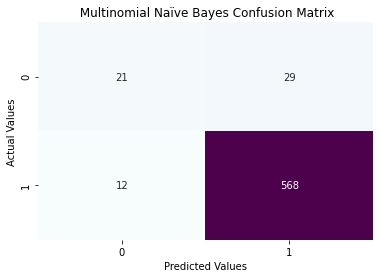

In [51]:
NB = accuracy_score(y_test,ypred_NB)
print(' Multinomial Naïve Bayes Accuracy Score: ',NB)
cm_rfc=my_confusion_matrix(y_test, ypred_NB, ' Multinomial Naïve Bayes Confusion Matrix')

# KNN CLASSIFICATION

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [53]:
y_pred = knn.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

KNN Classifier Accuracy Score:  0.9158730158730158
              precision    recall  f1-score   support

           0       0.20      0.02      0.04        50
           1       0.92      0.99      0.96       580

    accuracy                           0.92       630
   macro avg       0.56      0.51      0.50       630
weighted avg       0.86      0.92      0.88       630



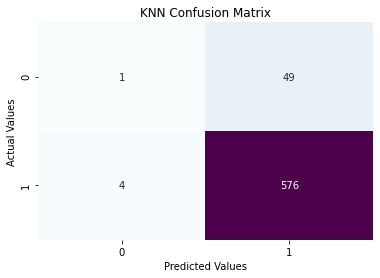

In [54]:
Knn = accuracy_score(y_test,y_pred)
print('KNN Classifier Accuracy Score: ',Knn)
cm_rfc=my_confusion_matrix(y_test, y_pred, 'KNN Confusion Matrix')

# LOGISTIC REGRESSION

In [56]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

Y_pred = lr.predict(X_test)
Y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

LOGISTIC REGRESSION Accuracy Score:  0.9412698412698413
              precision    recall  f1-score   support

           0       0.81      0.34      0.48        50
           1       0.95      0.99      0.97       580

    accuracy                           0.94       630
   macro avg       0.88      0.67      0.72       630
weighted avg       0.93      0.94      0.93       630



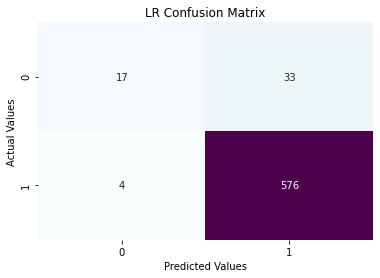

In [57]:
lr = accuracy_score(y_test,Y_pred)
print('LOGISTIC REGRESSION Accuracy Score: ',lr)
cm_rfc=my_confusion_matrix(y_test, Y_pred, 'LR Confusion Matrix')

# ACCURACY RESULTS IN THE FORM OF BARPLOT


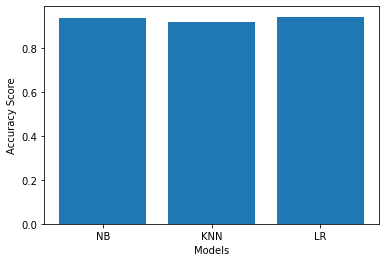

In [59]:
plt.bar(x=['NB','KNN','LR'],height=[NB,Knn,lr])
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.show()

# BY OBSERVING ALL THE ACCURACIES FROM ALL THE MODELS LOGISTIC REGRESSION MODELS GIVES US THE BEST ACCURACY